# Project: Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected for the analysis contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings, revenue, budget, genres and runtime of each movie and its popularity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)#this is to display the outputs in non cientific format

> The questions that are going to be propose will be oriented to the relationship between the movie genres and its respective budget and revenue, the historic popularity of movie genres, the caracteristics associated to better revenues, and the implications correlated to a bigger budgets.

<a id='wrangling'></a>
## Data Wrangling

> In this section, the data will be loaded and explored in case some cleanliness is need, and then the corresponding cleaning decisions.

### General Properties

First we load the data from the csv file and apply the .head(), .info(), .describe() and .hist() functions to view its columns and properties, and mainly to look for missing or erronealy entered data.

In [2]:
df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


Now we look which are the columns with missing values and if there is a column with an incorrect datatype. 

In [3]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The columns with the most quantity of null values are 'homepage', 'tagline', 'production_companies' and 'keywords', but they are not involved in our goals so later we will drop them.

Then we use describe() to see if there is erroneously entered data like the limits of the values of each column.

In [4]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


For the case of the column 'runtime', the upper limit is 900 because there are not only movies, also series. Another detail its that there are movies with 0 runtime, budget and revenue; first, its imposible that a movie has 0 runtime; second, it nearly imposible that a movie was developed with cero budget; and finally, we can not be sure if the revenue was truly cero or the data is really missing or was erronealy entered.

Finally we visualize the histograms of each column to notice better its distribution.

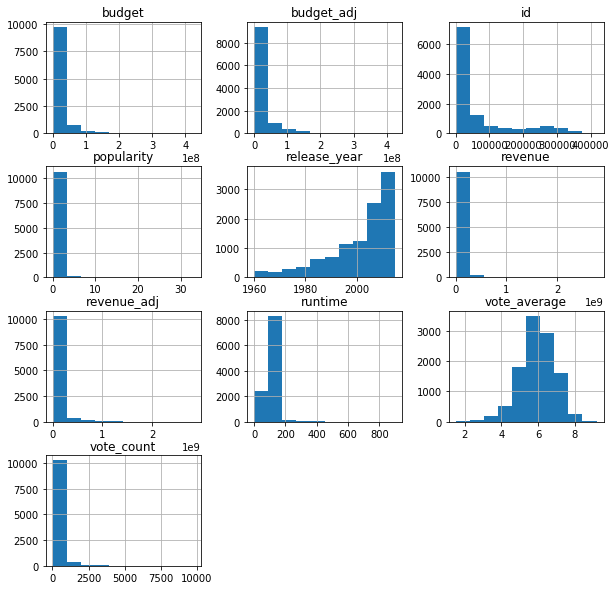

In [5]:
df_movies.hist(figsize=(10,10));

In the histograms we can see that the distributions of budget and revenue are affected by the quantity of values equal to cero or missing values.

In [6]:
df_movies.query('budget==0')['budget'].count()

5696

In [7]:
df_movies.query('revenue==0')['revenue'].count()

6016

In [8]:
df_movies.query('runtime==0')['runtime'].count()

31

There are only 31 records of movies with cero runtime. 

### Data Cleaning

First of all we will make a cope of the original data set to work with.

In [9]:
df_clean = df_movies.copy()

Initially we will drop all the columns with information that don´t have relationship with the variables related to the questions described in the introduction.

In [10]:
df_clean.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'release_date', 'tagline', 'keywords', 'overview', 'production_companies'], axis=1, inplace=True)
df_clean.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.986,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.500,2015,137999939.280,1392445892.524
1,28.420,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.100,2015,137999939.280,348161292.489
2,13.113,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.300,2015,101199955.472,271619025.408
3,11.173,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.500,2015,183999919.040,1902723129.802
4,9.335,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.300,2015,174799923.088,1385748801.471


Now we see the quantity of missing values left in the dataset and check again which are the columns with wrong datatype.

In [11]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [12]:
df_clean.dropna(inplace=True)

We search for duplicates and drop them.

In [13]:
df_clean.duplicated().sum()

1

In [14]:
df_clean.drop_duplicates(inplace=True)
df_clean.duplicated().sum()

0

For the runtime column, first we look for the case with the upper limit and searching the title in the web we found out taht it was a series. Because of this, we will not consider the information of instances with a runtime greater than 5 hours.

In [15]:
df_clean.query('runtime==runtime.max()')

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,0.007,0,0,The Story of Film: An Odyssey,900,Documentary,14,9.200,2011,0.000,0.000


The same way we check for lower limit of runtime.

In [16]:
df_clean.query('runtime==runtime.min()')

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876,0,0,Mythica: The Necromancer,0,Fantasy|Action|Adventure,11,5.400,2015,0.000,0.000
334,0.358,0,0,Ronaldo,0,Documentary,80,6.500,2015,0.000,0.000
410,0.098,0,0,Anarchy Parlor,0,Horror,15,5.600,2015,0.000,0.000
445,0.219,0,0,The Exorcism of Molly Hartley,0,Horror,52,5.000,2015,0.000,0.000
486,0.177,0,0,If There Be Thorns,0,TV Movie|Drama,11,5.400,2015,0.000,0.000
595,0.029,0,0,Deep Dark,0,Horror,11,4.600,2015,0.000,0.000
616,0.027,0,0,The Outfield,0,Drama|Comedy,20,6.600,2015,0.000,0.000
1241,0.135,0,0,Dance-Off,0,Romance|Music|Comedy,18,5.700,2014,0.000,0.000
1289,0.037,3250000,0,Treehouse,0,Thriller|Horror|Mystery,16,3.400,2014,2993545.915,0.000
1293,0.037,0,0,Tim Maia,0,Documentary|Drama|Music,14,6.000,2014,0.000,0.000


In [17]:
df_clean = df_clean.query('runtime<=270 & runtime!=0')
df_clean.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10782.000,10782.000,10782.000,10782.000,10782.000,10782.000,10782.000,10782.000,10782.000
mean,0.650,14711149.424,40121809.924,101.503,218.855,5.973,2001.282,17656468.587,51750083.177
std,1.003,30988666.591,117403244.619,24.067,577.606,0.933,12.829,34388860.588,145121064.940
min,0.000,0.000,0.000,2.000,10.000,1.500,1960.000,0.000,0.000
25%,0.209,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,0.386,0.000,0.000,99.000,39.000,6.000,2006.000,0.000,0.000
75%,0.718,15575000.000,24703150.500,111.000,147.000,6.600,2011.000,21033371.653,34152401.213
max,32.986,425000000.000,2781505847.000,270.000,9767.000,8.900,2015.000,425000000.000,2827123750.412


Like we said before, we drop all the instances with cero budget and revenue due to possible missing data.

In [18]:
df_clean = df_clean.query('budget!=0').query('revenue!=0')

In the following cells I create a new dataset on the purpose of studying the relationships between the genres and other attributes. 
>First I write a function that splits the column of genres into separate columns with only one value on each. This function was provided by Udacity´s staff on the questions about this proyect.

In [19]:
def split_function(name):
    df_splited = df_clean[name].str.split('|', expand = True)
    num_col = len(df_splited.columns)
    list_column = []
    for i in range(num_col):
        print(name+str(i))
        list_column.append(name+str(i+1))
    df_splited.columns = list_column
    return df_splited

In [20]:
df_genres = split_function('genres')

genres0
genres1
genres2
genres3
genres4


Thanks to this function, now we have a data set with one column for each genre the movie belongs and in the same order that the df_clean data set. Looks like the largest number of genres a movie belongs is five.

In [21]:
df_genres.tail()

,genres1,genres2,genres3,genres4,genres5
10822,Drama,None,None,None,None
10828,Mystery,Thriller,None,None,None
10829,Action,Western,None,None,None
10835,Action,Adventure,Drama,War,Romance
10848,Adventure,Science Fiction,None,None,None


>Secondly, we drop the original column of genres and add the new one to the "clean" data set.

In [22]:
df_clean.drop('genres', axis=1, inplace=True)

In [23]:
df_clean = pd.concat([df_clean, df_genres], axis=1, sort=False)
df_clean.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres1,genres2,genres3,genres4,genres5
0,32.986,150000000,1513528810,Jurassic World,124,5562,6.500,2015,137999939.280,1392445892.524,Action,Adventure,Science Fiction,Thriller,None
1,28.420,150000000,378436354,Mad Max: Fury Road,120,6185,7.100,2015,137999939.280,348161292.489,Action,Adventure,Science Fiction,Thriller,None
2,13.113,110000000,295238201,Insurgent,119,2480,6.300,2015,101199955.472,271619025.408,Adventure,Science Fiction,Thriller,None,None
3,11.173,200000000,2068178225,Star Wars: The Force Awakens,136,5292,7.500,2015,183999919.040,1902723129.802,Action,Adventure,Science Fiction,Fantasy,None
4,9.335,190000000,1506249360,Furious 7,137,2947,7.300,2015,174799923.088,1385748801.471,Action,Crime,Thriller,None,None


> Thirdly, we split each instance into the number of genres that were splitted previously, in this way, it will create a data set with only one column for each genre of the movie. At the end we drop values for 'none'. This new data set will ease the plots with value_count for genres.

In [24]:
df1=df_clean.copy()
df2=df_clean.copy()
df3=df_clean.copy()
df4=df_clean.copy()
df5=df_clean.copy()

In [25]:
df1.drop(['genres2','genres3','genres4','genres5'], axis=1, inplace=True)
df2.drop(['genres1','genres3','genres4','genres5'], axis=1, inplace=True)
df3.drop(['genres1','genres2','genres4','genres5'], axis=1, inplace=True)
df4.drop(['genres1','genres2','genres3','genres5'], axis=1, inplace=True)
df5.drop(['genres1','genres2','genres3','genres4'], axis=1, inplace=True)

In [26]:
df1.rename(columns={"genres1":"genres"},inplace=True)
df2.rename(columns={"genres2":"genres"},inplace=True)
df3.rename(columns={"genres3":"genres"},inplace=True)
df4.rename(columns={"genres4":"genres"},inplace=True)
df5.rename(columns={"genres5":"genres"},inplace=True)

In [27]:
df_movies_splitgenres=df1.append(df2).append(df3).append(df4).append(df5)

In [28]:
df_movies_splitgenres['genres'] = df_movies_splitgenres['genres'].astype(str)

In [29]:
df_none_index = df_movies_splitgenres.query('genres=="None"').index

In [30]:
df_movies_splitgenres.drop(df_none_index, axis=0, inplace=True)

To be sure, we look for the first and last instances to check if it is ok.

In [31]:
df_movies_splitgenres.head()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
20,5.462,190000000,209035668,Tomorrowland,130,1899,6.200,2015,174799923.088,192312729.942,Action
37,3.339,175000000,331926147,The Good Dinosaur,93,1087,6.600,2015,160999929.160,305371920.876,Adventure
38,3.237,50000000,71561644,Run All Night,114,814,6.300,2015,45999979.760,65836683.512,Action
46,2.976,135000000,368871007,Home,94,1060,6.900,2015,124199945.352,339361177.121,Fantasy
49,2.885,4000000,9064511,The Lobster,118,638,6.600,2015,3679998.381,8339346.451,Thriller


In [32]:
df_movies_splitgenres.tail()

,popularity,budget,revenue,original_title,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
10539,0.348,2700000,3500000,The Wraith,93,48,5.900,1986,5371397.309,6962922.438,Crime
10656,0.381,25485000,29548291,Tora! Tora! Tora!,144,93,6.600,1970,143133147.244,165954086.189,War
10683,0.429,10000000,1500000,The Private Life of Sherlock Holmes,125,21,6.700,1970,56163683.439,8424552.516,Romance
10788,0.278,24000000,21049053,The Wiz,134,30,6.100,1978,80224816.678,70360684.090,Science Fiction
10835,0.300,12000000,20000000,The Sand Pebbles,182,28,7.000,1966,80616176.308,134360293.846,Romance


<a id='eda'></a>
## Exploratory Data Analysis


### Q1: Which genres are most popular from year to year?

In [33]:
genres_mean=df_movies_splitgenres.groupby(['release_year','genres'])['popularity'].mean().sort_values(ascending = False).groupby(level = 'release_year').nlargest(1).reset_index(level=0, drop=True)
genres_mean[23:]

release_year  genres         
1995          Crime             1.137
1996          Family            1.617
1997          Animation         3.489
1998          Animation         1.856
1999          Fantasy           1.577
2000          Fantasy           1.768
2001          Horror            2.449
2002          Science Fiction   1.936
2003          Thriller          1.360
2004          Family            1.836
2005          Family            1.277
2006          Family            1.573
2007          Horror            2.008
2008          Romance           1.586
2009          Action            2.367
2010          Mystery           2.833
2011          Western           1.499
2012          Family            3.627
2013          Horror            2.605
2014          Science Fiction   5.787
2015          Family            3.926
Name: popularity, dtype: float64

In order to have a better visual of the data, only the period of time between 1990-2015 will be used.

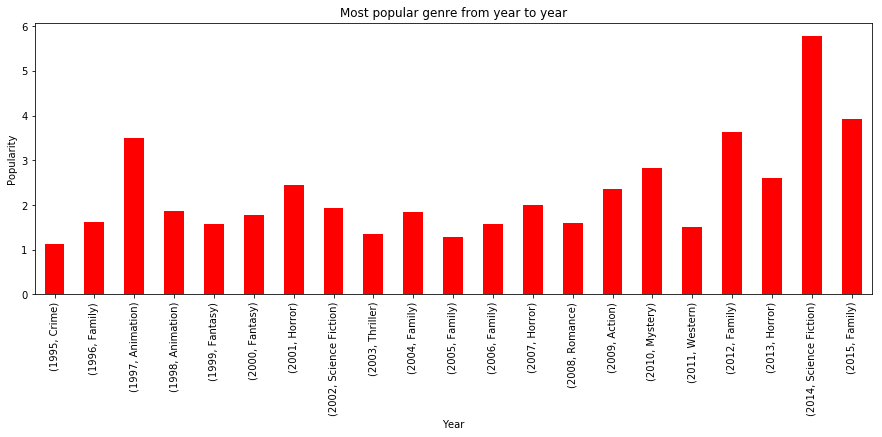

In [34]:
genres_mean[23:].plot(kind='bar', figsize=(15,5), color='red');
plt.title('Most popular genre from year to year')
plt.xlabel('Year')
plt.ylabel('Popularity');

###  Q2: What kinds of properties are associated with movies that have high revenues in contrast to the ones with low revenue?

In [35]:
re_high = df_clean.query('revenue_adj >= revenue_adj.median()')

In [36]:
re_high.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000
mean,1.699,55589685.376,197560833.564,113.632,869.312,6.324,2000.103,65752316.806,252416296.018
std,1.867,49631891.915,214318103.378,21.105,1104.806,0.741,12.123,50220084.400,257841945.167
min,0.010,113.000,9440272.000,69.000,10.000,3.400,1960.000,224.803,61742744.959
25%,0.767,20000000.000,74844469.000,98.000,201.500,5.800,1994.000,28761567.467,96022964.851
50%,1.207,40000000.000,124272124.000,110.000,466.000,6.300,2003.000,51950042.992,163275219.403
75%,1.975,75000000.000,232150276.500,125.000,1056.000,6.900,2009.000,90294897.380,305992542.179
max,32.986,380000000.000,2781505847.000,248.000,9767.000,8.300,2015.000,368371256.185,2827123750.412


Now we diplay the properties of the low revenue data to compare with.

In [37]:
re_low = df_clean.query('revenue_adj <= revenue_adj.median()')

In [38]:
re_low.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000,1927.000
mean,0.684,18821341.124,17833173.056,104.692,186.308,6.013,2002.410,22737911.569,21744673.309
std,0.593,20597283.073,15912371.296,16.777,308.172,0.817,10.248,23849290.839,18022634.763
min,0.001,1.000,2.000,15.000,10.000,2.200,1960.000,0.969,2.371
25%,0.332,5000000.000,4004456.500,93.000,36.000,5.500,1996.000,7000000.000,5287896.103
50%,0.538,13500000.000,14000000.000,102.000,86.000,6.100,2005.000,16380583.673,18404200.196
75%,0.848,25000000.000,28004231.000,113.000,206.000,6.600,2010.000,31348627.278,35354822.205
max,7.192,425000000.000,66980456.000,219.000,5754.000,8.400,2015.000,425000000.000,61742744.959


### Q3: Do longer movies have better revenues?

In [39]:
higth_rt = df_clean.query('runtime>=runtime.median()')
low_rt = df_clean.query('runtime<=runtime.median()')

mean_revenue_high = higth_rt['revenue_adj'].mean()
mean_revenue_low = low_rt['revenue_adj'].mean()

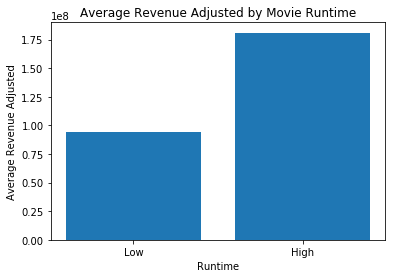

In [40]:
locations = [1, 2]
heights = [mean_revenue_low, mean_revenue_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue Adjusted by Movie Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Revenue Adjusted');

In [41]:
(mean_revenue_high/mean_revenue_low)

1.9200871366155128

There is clearly a difference from the revenue generally obtained between longer runtime and shorter runtime movies, been almost the double.

### Q4: Are movies with more Budget more voted than the others?

In [42]:
higth_b = df_clean.query('budget_adj>=budget_adj.mean()')
low_b = df_clean.query('budget_adj<=budget_adj.mean()')

mean_va_high = higth_b['vote_average'].mean()
mean_va_low = low_b['vote_average'].mean()

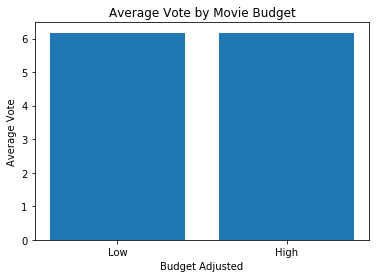

In [43]:
locations = [1, 2]
heights = [mean_va_low, mean_va_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Vote by Movie Budget')
plt.xlabel('Budget Adjusted')
plt.ylabel('Average Vote');

There is no much difference of the average vote in general between low and high budget movies

In [44]:
mean_va_low, mean_va_high

(6.1736505397840862, 6.1579881656804734)

### Q5: Which are top genres with the best Revenue/Budget ratio?

In [45]:
df_movies_splitgenres['Revenue/Budget_ratio'] = df_movies_splitgenres.apply(lambda row: row.revenue_adj/row.budget_adj, axis=1)


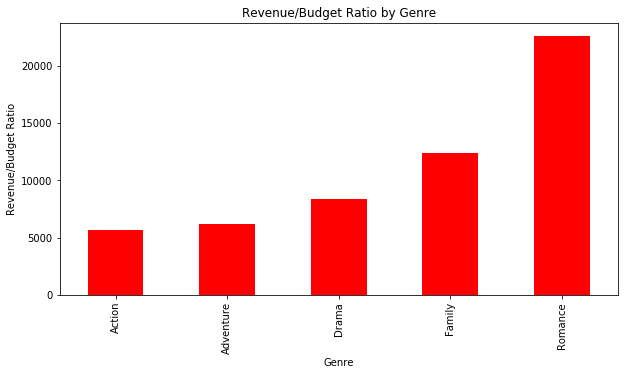

In [46]:
df_movies_splitgenres.groupby('genres')['Revenue/Budget_ratio'].mean().sort_values()[13:].plot(kind='bar', color='red',figsize=(10,5))
plt.title('Revenue/Budget Ratio by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue/Budget Ratio');

<a id='conclusions'></a>
## Conclusions

The questions that were developed in this project were based on the budget, revenue, genre and popularity attributes of each movie.

Data wrangling:

At first, a briefly exploratory analysis was carried out in order to find issues with the content or quality of the data, and to find hidden patterns in the data of the previously mentioned variables, both with respect to their distribution and their statistical properties. An attempt was then made to identify data cleansing problems to correct them in the next stage. Secondly, the columns of variables that will not be used were eliminated, a duplicate instance was eliminated, and the instances with missing or erroneously imputed data were eliminated since they were considered as a negligible percentage of the totality of the data. At the end of the data cleansing, a new database was created but with an instance or row for each genre to which each movie belongs. This last data set was created in order to facilitate the answer to questions related to the genre variable.

Findings of the exploratory analysis:

In the first question, it was estimated which was on average the most popular movie genre for each year in the last 20 years, showing the average popularity level reached by this. In the time interval considered the preferred genres for more years, they turned out to be Family, Science Fiction and Horror, in that order.

In the second question, the statistical properties presented by the films that have a high average revenue, in contrast to those with a low one, were visualized. Some of these to mention are that movies with a high revenue have an average of 9 more minutes of runtime, are on average 4.7 times more voted, and have an average score greater than one unit in the popularity index.

From the third question, it can be deduced that the films with the highest runtime have, on average, 1.92 times more revenue than the films with the lowest runtime.

With the graph of the fourth question, it can be seen that, on average, there is not much difference between the average vote for movies with a high or low budget.

Finally, in the last question, it was estimated and visualized which were the movie genres that had, on average, a higher Revenue / Budget ratio. The highest estimated ratios, in descending order, are for Romance, Family, Drama, Adventure and Action.



In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0